In [1]:
dataset_path = '/content/drive/MyDrive/processed_train_data.csv'

In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv(dataset_path)

# Display a sample of the dataset
print(df.head())


                                                Text Label
0  ധർമ്മം ധർമ്മം ധർമ്മം തരണേ അതാണോടാ ഈ ധർമ്മ എത് ...     R
1  നീയെന്താ മലയാളത്തിൽ തൊലിക്കുന്ന വന്നിരുന്നു കൊ...     P
2  നിങ്ങൾ നോക്കിക്കോളൂ അമിത്ഷായുടേ എത് ഫോട്ടോയും ...     P
3  അല്ലേങ്കിൽ ചനറൽ ന്യൂട്രാലിറ്റി കൊണ്ടുവരുന്ന സമ...     G
4     നമ്മുടേ ടിപ്പുസുൽത്താൻ എന്ന് പറഞ്ഞ കൊള്ളക്കാരൻ     R


In [4]:
from sklearn.model_selection import train_test_split

# Separate features and labels
X = df['Text']
y = df['Label']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

from sklearn.feature_extraction.text import TfidfVectorizer  # Use TfidfVectorizer instead

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)  # Transform test data


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'early_stopping': False, 'fit_intercept': False, 'max_iter': 1000, 'random_state': 42, 'tol': 0.0001}
Best Cross-Validation Score: 0.9415
Passive Aggressive Classifier with Hyperparameter Tuning:
               precision    recall  f1-score   support

           C       0.99      0.89      0.94        81
           G       0.92      1.00      0.96        81
           N       0.91      0.93      0.92        81
           P       0.97      0.95      0.96        82
           R       0.98      1.00      0.99        81

    accuracy                           0.95       406
   macro avg       0.95      0.95      0.95       406
weighted avg       0.95      0.95      0.95       406

Accuracy: 0.9532


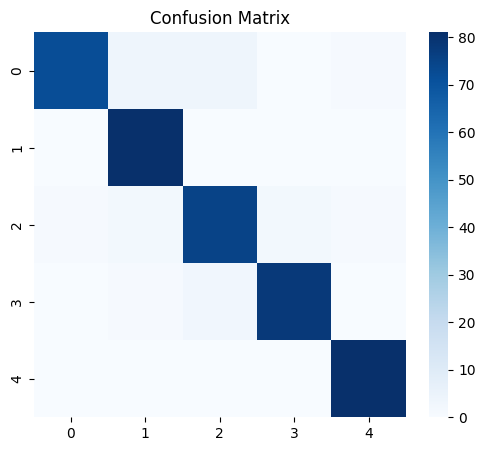

Macro F1 Score: 0.9529


<ipython-input-6-f4aeb8f41b78>:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette="viridis")


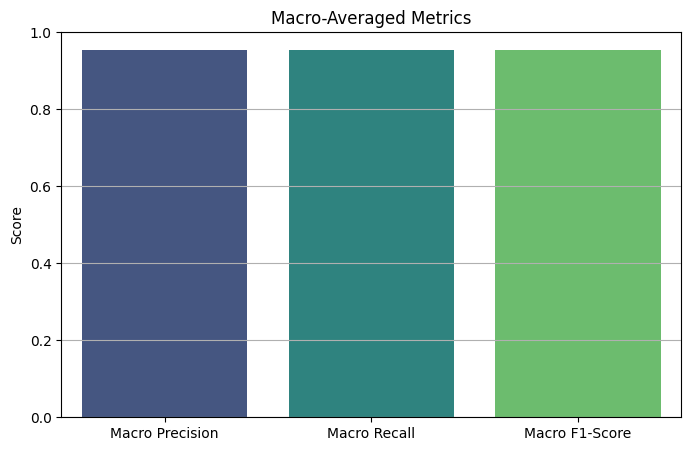

In [6]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns

# Define hyperparameter grid for PassiveAggressiveClassifier
param_grid_pa = {
    'max_iter': [1000, 5000, 10000],           # Maximum number of iterations
    'tol': [1e-3, 1e-4, 1e-5],                 # Tolerance for stopping criteria
    'random_state': [42],                      # Ensure reproducibility
    'early_stopping': [True, False],           # Option to stop early if the performance on the validation set stops improving
    'fit_intercept': [True, False]             # Option to fit an intercept term
}

# Initialize the PassiveAggressiveClassifier
pa_classifier = PassiveAggressiveClassifier(random_state=42)

# Perform GridSearchCV
grid_search_pa = GridSearchCV(estimator=pa_classifier, param_grid=param_grid_pa, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the model with hyperparameter tuning
grid_search_pa.fit(X_train_tfidf, y_train)

# Get the best parameters and best score
best_params_pa = grid_search_pa.best_params_
best_score_pa = grid_search_pa.best_score_
print(f"Best Parameters: {best_params_pa}")
print(f"Best Cross-Validation Score: {best_score_pa:.4f}")

# Use the best estimator from grid search to make predictions
best_pa_classifier = grid_search_pa.best_estimator_

# Predictions
y_pred_tfidf_pa = best_pa_classifier.predict(X_test_tfidf)

# Print Classification Report
print("Passive Aggressive Classifier with Hyperparameter Tuning:\n", classification_report(y_test, y_pred_tfidf_pa))

# Accuracy
accuracy_pa = accuracy_score(y_test, y_pred_tfidf_pa)
print(f"Accuracy: {accuracy_pa:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_tfidf_pa)

# Heatmap Visualization (No Labels)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=False, cmap="Blues", cbar=True)
plt.title("Confusion Matrix")
plt.show()

# Macro-Averaged Metrics (Precision, Recall, F1)
macro_precision, macro_recall, macro_f1_pa, _ = precision_recall_fscore_support(
    y_test, y_pred_tfidf_pa, average="macro"
)

# Print Macro F1 Score
print(f"Macro F1 Score: {macro_f1_pa:.4f}")

# Plot Macro-Averaged Metrics
metrics = ["Macro Precision", "Macro Recall", "Macro F1-Score"]
values = [macro_precision, macro_recall, macro_f1_pa]

plt.figure(figsize=(8, 5))
sns.barplot(x=metrics, y=values, palette="viridis")
plt.title("Macro-Averaged Metrics")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(axis="y")
plt.show()


Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py", line 1568, in fit
    super().fit(X, Y, sample_weight=sample_weight)
  File "/usr/local/lib/pyt

Best Parameters: {'alpha': 0.1, 'max_iter': 1000, 'random_state': 42, 'solver': 'auto'}
Best Cross-Validation Score: 0.9384
Ridge Classifier with Hyperparameter Tuning:
               precision    recall  f1-score   support

           C       0.96      0.86      0.91        81
           G       0.92      1.00      0.96        81
           N       0.94      0.94      0.94        81
           P       0.96      0.95      0.96        82
           R       0.98      1.00      0.99        81

    accuracy                           0.95       406
   macro avg       0.95      0.95      0.95       406
weighted avg       0.95      0.95      0.95       406

Accuracy: 0.9507


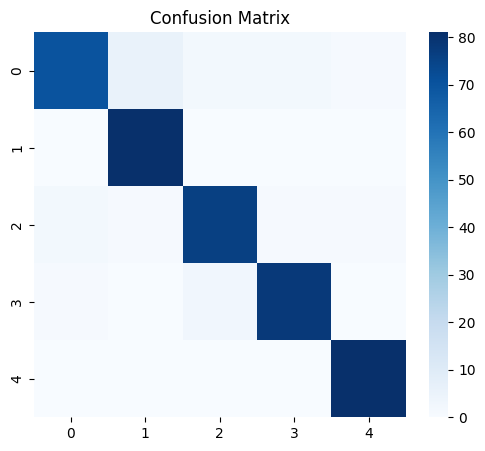

Macro F1 Score: 0.9502


<ipython-input-8-c0e3ff7571a8>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette="viridis")


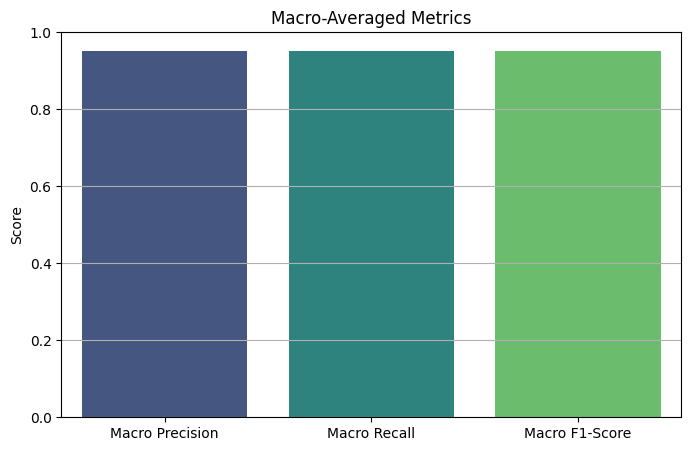

In [8]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns

# Define hyperparameter grid for RidgeClassifier
param_grid_ridge = {
    'alpha': [0.1, 1, 10, 100],               # Regularization strength
    'solver': ['auto', 'svd', 'lsqr', 'saga'], # Solver for optimization
    'max_iter': [1000, 5000, 10000],           # Maximum number of iterations
    'random_state': [42]                       # Ensures reproducibility
}

# Initialize the RidgeClassifier
ridge_classifier = RidgeClassifier(random_state=42)

# Perform GridSearchCV for hyperparameter tuning
grid_search_ridge = GridSearchCV(estimator=ridge_classifier, param_grid=param_grid_ridge, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the model with hyperparameter tuning
grid_search_ridge.fit(X_train_tfidf, y_train)

# Get the best parameters and best score
best_params_ridge = grid_search_ridge.best_params_
best_score_ridge = grid_search_ridge.best_score_
print(f"Best Parameters: {best_params_ridge}")
print(f"Best Cross-Validation Score: {best_score_ridge:.4f}")

# Use the best estimator from grid search to make predictions
best_ridge_classifier = grid_search_ridge.best_estimator_

# Predictions
y_pred_tfidf_ridge = best_ridge_classifier.predict(X_test_tfidf)

# Print Classification Report
print("Ridge Classifier with Hyperparameter Tuning:\n", classification_report(y_test, y_pred_tfidf_ridge))

# Accuracy
accuracy_ridge = accuracy_score(y_test, y_pred_tfidf_ridge)
print(f"Accuracy: {accuracy_ridge:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_tfidf_ridge)

# Heatmap Visualization (No Labels)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=False, cmap="Blues", cbar=True)
plt.title("Confusion Matrix")
plt.show()

# Macro-Averaged Metrics (Precision, Recall, F1)
macro_precision, macro_recall, macro_f1_ridge, _ = precision_recall_fscore_support(
    y_test, y_pred_tfidf_ridge, average="macro"
)

# Print Macro F1 Score
print(f"Macro F1 Score: {macro_f1_ridge:.4f}")

# Plot Macro-Averaged Metrics
metrics = ["Macro Precision", "Macro Recall", "Macro F1-Score"]
values = [macro_precision, macro_recall, macro_f1_ridge]

plt.figure(figsize=(8, 5))
sns.barplot(x=metrics, y=values, palette="viridis")
plt.title("Macro-Averaged Metrics")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(axis="y")
plt.show()


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py"

Best Parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 42}
Best Cross-Validation Score: 0.9575
Extra Trees Classifier with Hyperparameter Tuning:
               precision    recall  f1-score   support

           C       0.96      0.98      0.97        81
           G       0.98      1.00      0.99        81
           N       0.93      0.94      0.93        81
           P       1.00      0.95      0.97        82
           R       1.00      1.00      1.00        81

    accuracy                           0.97       406
   macro avg       0.97      0.97      0.97       406
weighted avg       0.97      0.97      0.97       406

Accuracy: 0.9729
Log Loss: 0.0966


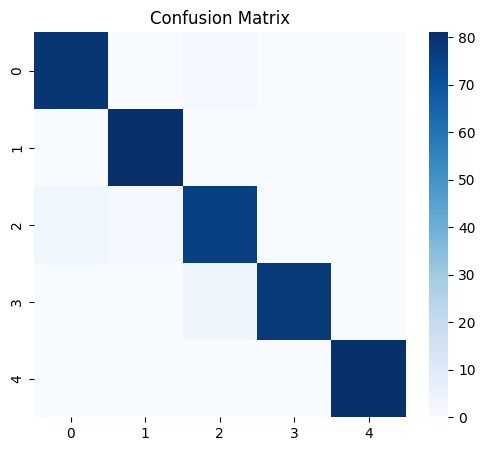

Macro F1 Score: 0.9729


<ipython-input-9-12c1e4a33f87>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette="viridis")


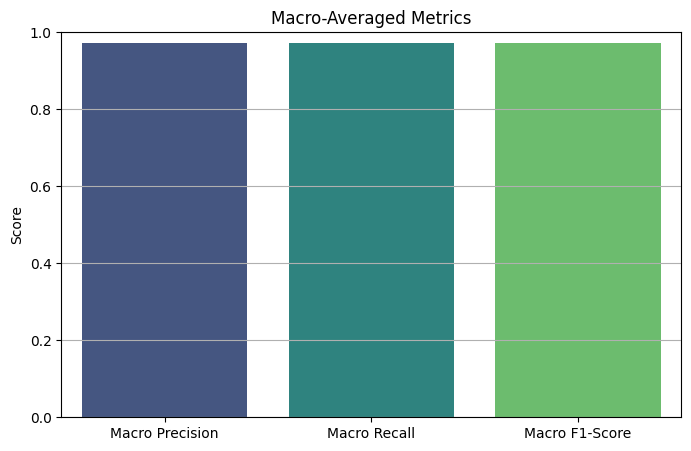

In [9]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, log_loss, confusion_matrix, precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns

# Define hyperparameter grid for ExtraTreesClassifier
param_grid_et = {
    'n_estimators': [50, 100, 200],               # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],               # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],               # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],                 # Minimum samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],      # Number of features to consider when looking for the best split
    'random_state': [42]                           # Ensures reproducibility
}

# Initialize the ExtraTreesClassifier
et_classifier = ExtraTreesClassifier(random_state=42)

# Perform GridSearchCV for hyperparameter tuning
grid_search_et = GridSearchCV(estimator=et_classifier, param_grid=param_grid_et, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the model with hyperparameter tuning
grid_search_et.fit(X_train_tfidf, y_train)

# Get the best parameters and best score
best_params_et = grid_search_et.best_params_
best_score_et = grid_search_et.best_score_
print(f"Best Parameters: {best_params_et}")
print(f"Best Cross-Validation Score: {best_score_et:.4f}")

# Use the best estimator from grid search to make predictions
best_et_classifier = grid_search_et.best_estimator_

# Predictions
y_pred_et = best_et_classifier.predict(X_test_tfidf)
y_prob_et = best_et_classifier.predict_proba(X_test_tfidf)  # Probabilities for all classes

# Print Classification Report
print("Extra Trees Classifier with Hyperparameter Tuning:\n", classification_report(y_test, y_pred_et))

# Accuracy
accuracy_et = accuracy_score(y_test, y_pred_et)
print(f"Accuracy: {accuracy_et:.4f}")

# Calculate Log Loss (Loss for multi-class classification)
loss_et = log_loss(y_test, y_prob_et)
print(f"Log Loss: {loss_et:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_et)

# Heatmap Visualization (No Labels)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=False, cmap="Blues", cbar=True)
plt.title("Confusion Matrix")
plt.show()

# Macro-Averaged Metrics (Precision, Recall, F1)
macro_precision, macro_recall, macro_f1_et, _ = precision_recall_fscore_support(
    y_test, y_pred_et, average="macro"
)

# Print Macro F1 Score
print(f"Macro F1 Score: {macro_f1_et:.4f}")

# Plot Macro-Averaged Metrics
metrics = ["Macro Precision", "Macro Recall", "Macro F1-Score"]
values = [macro_precision, macro_recall, macro_f1_et]

plt.figure(figsize=(8, 5))
sns.barplot(x=metrics, y=values, palette="viridis")
plt.title("Macro-Averaged Metrics")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(axis="y")
plt.show()


In [10]:
import pandas as pd

# Create a list to hold the model names and their respective results
results = [
    ['Passive Aggressive', accuracy_pa, 'Nan', macro_f1_pa],  # Replace with results for Passive Aggressive
    ['Ridge', accuracy_ridge, 'Nan', macro_f1_ridge],  # Replace with results for Ridge Classifier
    ['Extra Trees', accuracy_et, loss_et, macro_f1_et]  # Replace with results for Extra Trees Classifier
]

# Create the DataFrame with the results
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Log Loss', 'Macro F1 Score'])

# Display the DataFrame
print("\nModel Performance Comparison:\n")
print(results_df)



Model Performance Comparison:

                Model  Accuracy Log Loss  Macro F1 Score
0  Passive Aggressive  0.953202      Nan        0.952932
1               Ridge  0.950739      Nan        0.950160
2         Extra Trees  0.972906  0.09661        0.972929


In [11]:
# Path to the test data (CSV file)
test_file_path = '/content/drive/MyDrive/processed_test_data.csv'

# Use pd.read_csv() to read CSV files (as the file is CSV, not Excel)
test_data = pd.read_csv(test_file_path)

# Proceed with the rest of the code as before
X_test_final = tfidf_vectorizer.transform(test_data['Transcript'])  # Assuming 'Transcript' is the column with input data

# Make predictions using the optimized models
test_data['Passive Aggressive'] = best_pa_classifier.predict(X_test_final)  # Use the optimized Passive Aggressive model
test_data['Ridge'] = best_ridge_classifier.predict(X_test_final)  # Use the optimized Ridge model
test_data['Extra Trees'] = best_et_classifier.predict(X_test_final)  # Use the optimized Extra Trees model

# Save the predictions to a CSV file
output_csv_path = '/content/drive/MyDrive/tfidf_novelml_predictions.csv'
test_data.to_csv(output_csv_path, index=False, encoding='utf-8')

print(f"Predictions saved to {output_csv_path}")


Predictions saved to /content/drive/MyDrive/tfidf_novelml_predictions.csv
